In [ ]:
!pip install --upgrade scikit-learn imbalanced-learn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 85.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


**Step 1: Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

**Step 2: Load Dataset and Check Info**

In [ ]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

**Step 3: Exploratory Data Analysis (EDA)**

**Class Distribution (Improved & Percentages)**

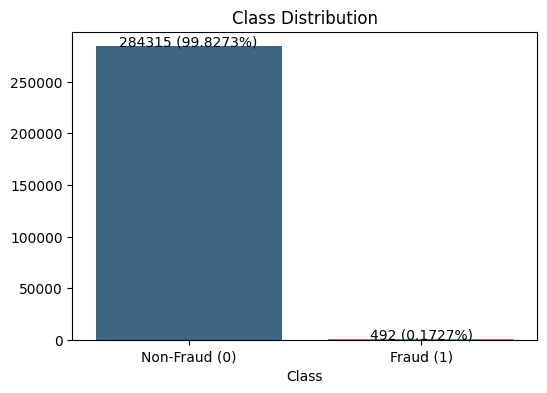

In [ ]:
plt.figure(figsize=(6, 4))
class_counts = df['Class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 200, f'{v} ({v/df.shape[0]*100:.4f}%)', ha='center')
plt.show()


**Correlation Matrix with Heatmap**

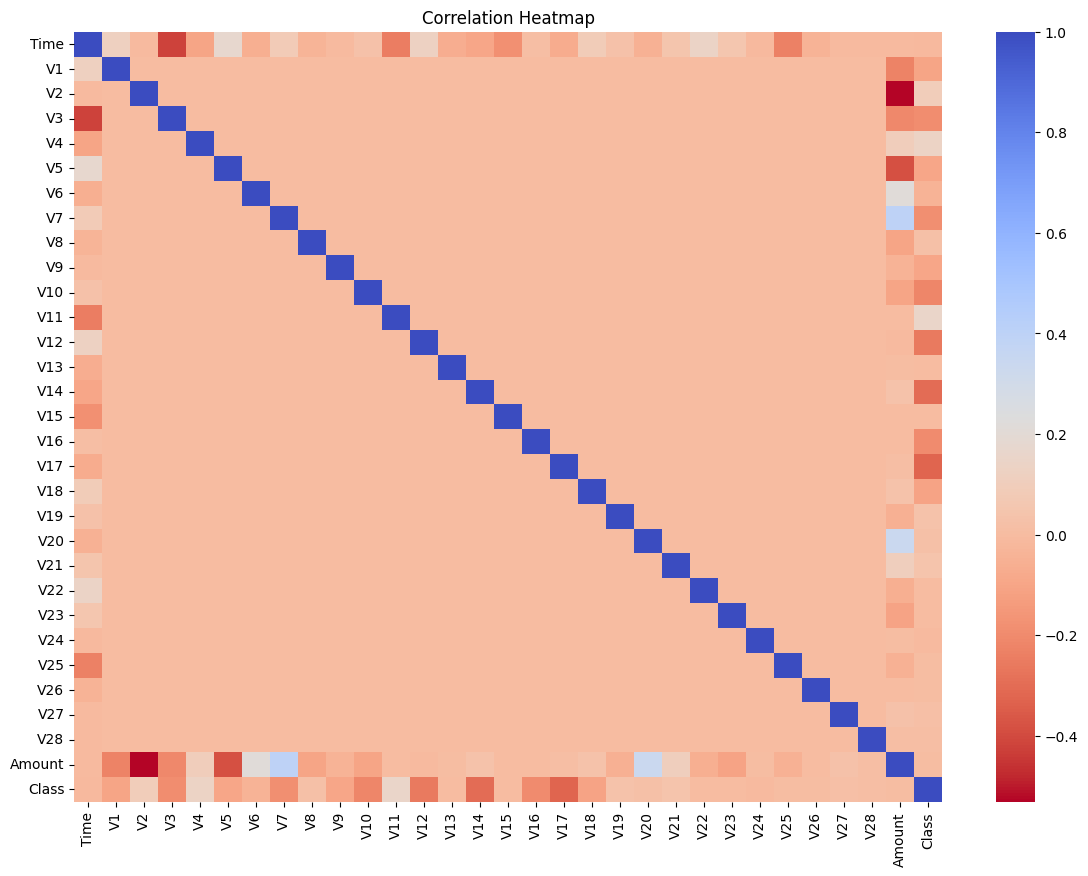

In [ ]:
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title('Correlation Heatmap')
plt.show()

**Top 10 Features Most Correlated with Fraud**

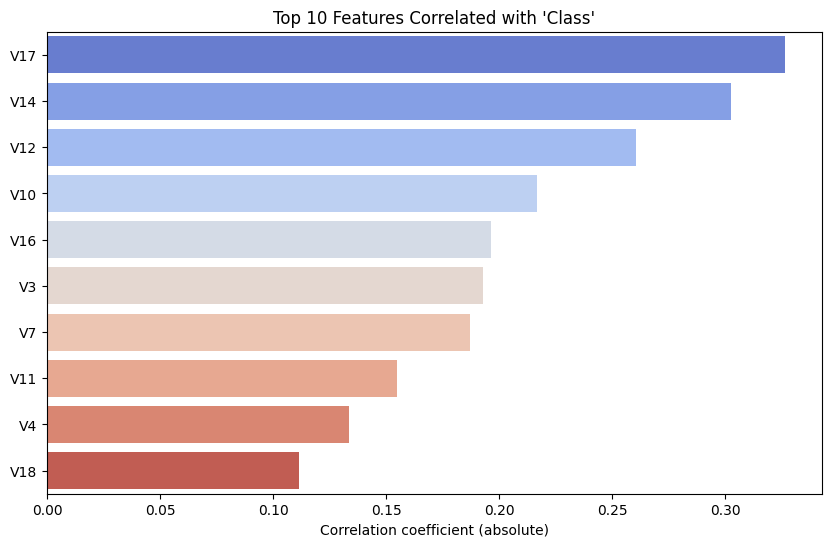

In [ ]:
corr_target = corr['Class'].drop('Class')
top_features = corr_target.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')
plt.title("Top 10 Features Correlated with 'Class'")
plt.xlabel("Correlation coefficient (absolute)")
plt.show()

**Amount Distribution by Class**

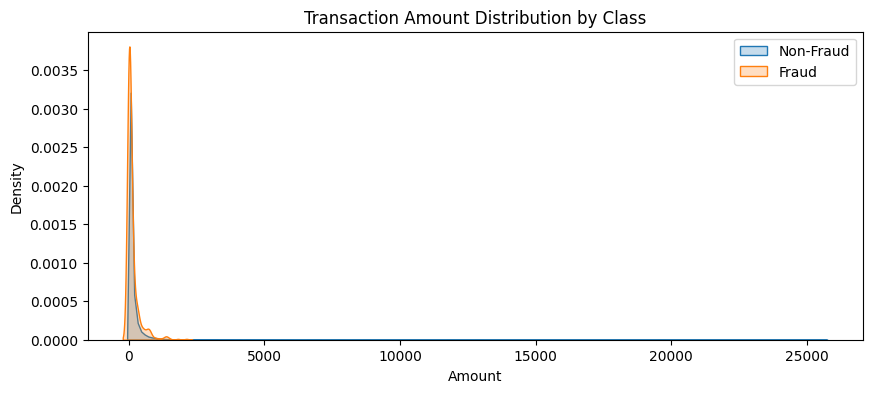

In [ ]:
plt.figure(figsize=(10, 4))
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Non-Fraud', shade=True)
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Fraud', shade=True)
plt.title('Transaction Amount Distribution by Class')
plt.legend()
plt.show()

**PCA Components Comparison Between Classes**

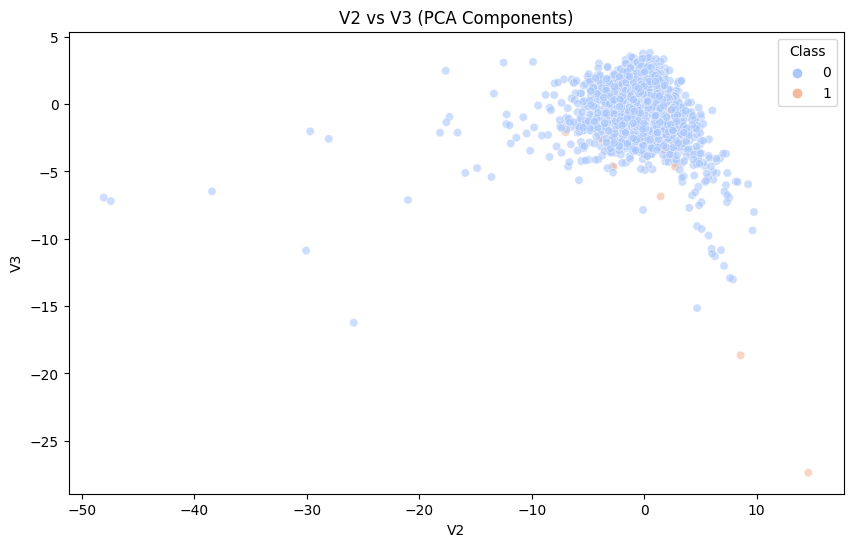

In [ ]:
import random
sampled_df = df.sample(10000, random_state=42)  # Use sample for performance

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_df, x='V2', y='V3', hue='Class', palette='coolwarm', alpha=0.6)
plt.title('V2 vs V3 (PCA Components)')
plt.show()


**Step 4: Feature Engineering**

In [ ]:
df['Hour'] = (df['Time'] // 3600) % 24
df.drop('Time', axis=1, inplace=True)

**Hour of Transaction by Class (New Feature)**

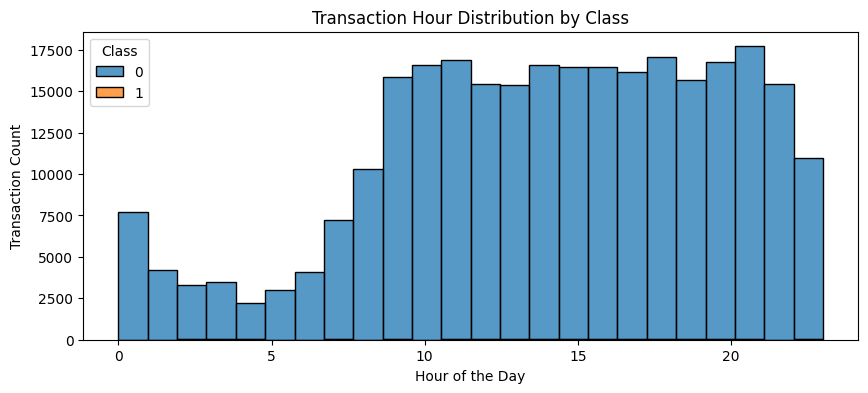

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='Hour', hue='Class', bins=24, multiple='stack')
plt.title('Transaction Hour Distribution by Class')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.show()

**Boxplot of Key Features (V14, V17)**

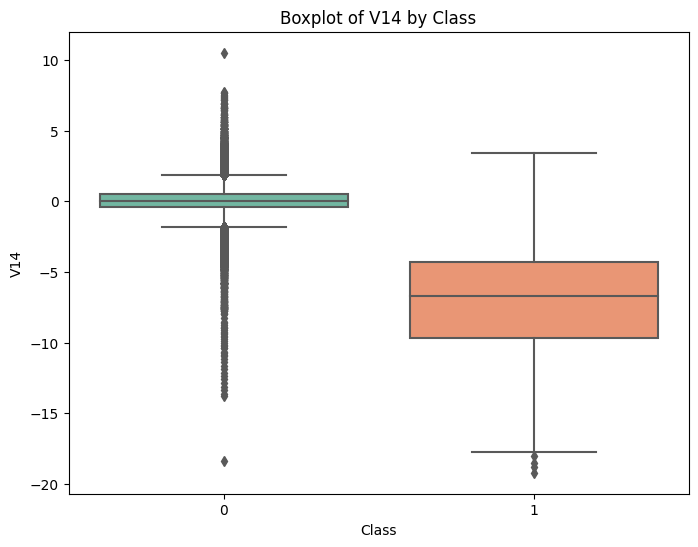

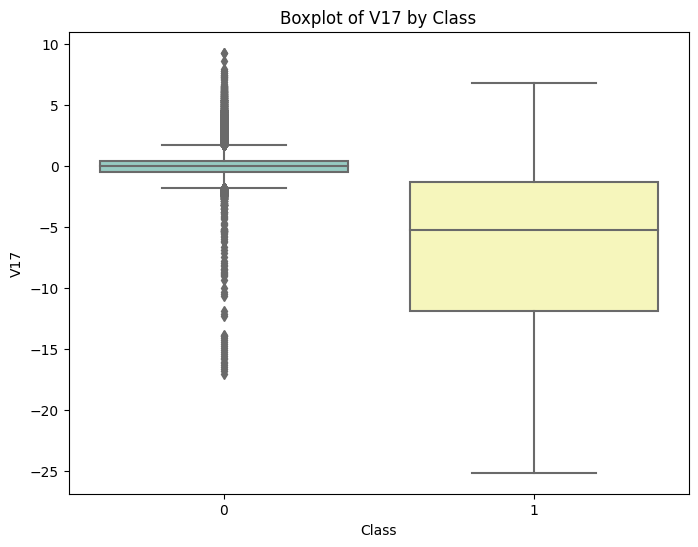

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='V14', data=df, palette='Set2')
plt.title("Boxplot of V14 by Class")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='V17', data=df, palette='Set3')
plt.title("Boxplot of V17 by Class")
plt.show()


**Step 5: Data Preprocessing**

In [ ]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

X = df.drop('Class', axis=1)
y = df['Class']

**Train-test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

**Handle Class Imbalance using SMOTE**

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

**Step 6: Define Models**

In [ ]:
models = {
    "LogisticRegression": LogisticRegression(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    # "RandomForest": RandomForestClassifier(),
    # "SVC": SVC(probability=True),
    # "KNeighbors": KNeighborsClassifier(),
    # "NaiveBayes": GaussianNB(),
    #"AdaBoost": AdaBoostClassifier(),
    #"GradientBoosting": GradientBoostingClassifier(),
}

**Train and Evaluate Untuned Models**

In [ ]:
results_untuned = {}

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results_untuned[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba),
        "y_pred": y_pred,
        "y_proba": y_proba,
        "model": model
    }

results_df = pd.DataFrame(results_untuned).T.sort_values(by="accuracy", ascending=False)

print("Model Accuracies (Untuned):\n")
print(results_df[['accuracy']].sort_values(by='accuracy', ascending=False))

best_model_name = results_df.index[0]
print("Best Untuned Model:", best_model_name)

Model Accuracies (Untuned):

                    accuracy
XGBoost             0.999315
LogisticRegression  0.972368
Best Untuned Model: XGBoost


**Step 7: ROC Curves**

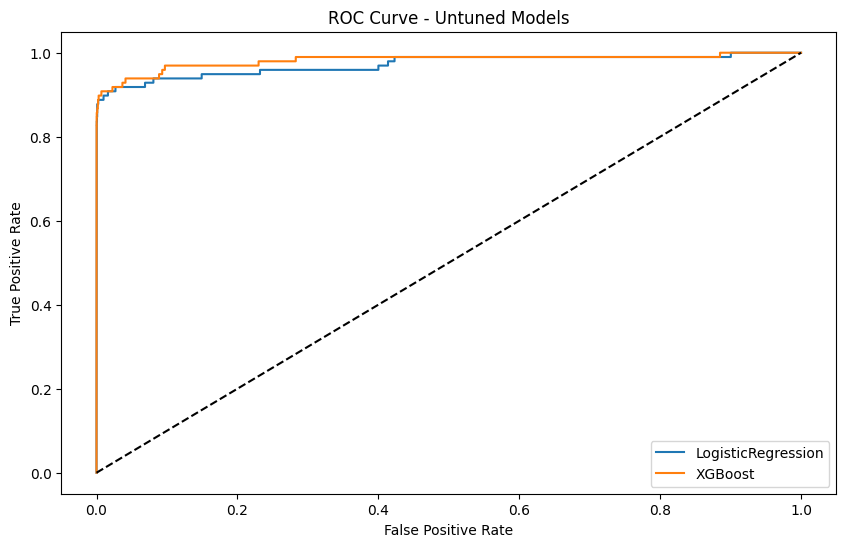

In [ ]:
plt.figure(figsize=(10,6))
for name, res in results_untuned.items():
    fpr, tpr, _ = roc_curve(y_test, res["y_proba"])
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Untuned Models")
plt.legend()
plt.show()

**Step 8: Confusion Matrix and Classification Report Best Untuned Model**

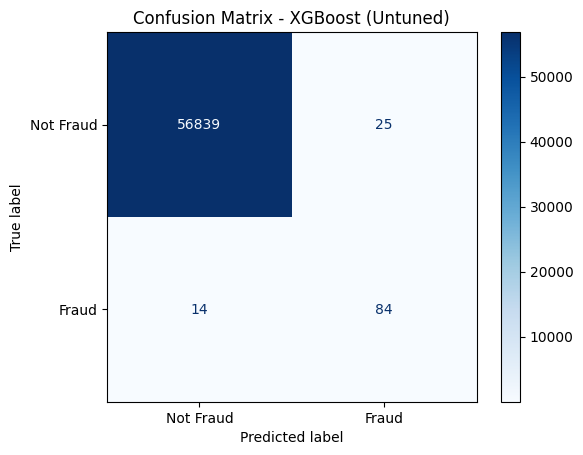


Classification Report for XGBoost (Untuned):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.86      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
best_model = results_untuned[best_model_name]["model"]
y_pred_best = results_untuned[best_model_name]["y_pred"]
best_cm = confusion_matrix(y_test, y_pred_best)

disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name} (Untuned)")
plt.show()

best_cr = classification_report(y_test, y_pred_best)
print(f"\nClassification Report for {best_model_name} (Untuned):\n")
print(best_cr)

In [ ]:
param_grids = {
    "LogisticRegression": {
        "penalty": ['l1', 'l2', 'elasticnet', None],
        "C": [0.01, 0.1, 1, 10],
        "solver": ['liblinear', 'saga'],
        "max_iter": [100, 200, 500]
    },
    # "XGBoost": {
    #     "n_estimators": [50, 100, 200],
    #     "max_depth": [3, 5, 7],
    #     "learning_rate": [0.01, 0.1, 0.2],
    #     "subsample": [0.7, 0.8, 1.0],
    #     "colsample_bytree": [0.7, 0.8, 1.0]
    # },
    # "AdaBoost": {
    #     "n_estimators": [50, 100, 200],
    #     "learning_rate": [0.01, 0.1, 1],
    #     "algorithm": ['SAMME', 'SAMME.R']
    # }
}


In [ ]:
# results_tuned = {}

# for name in [m for m in models if m in param_grids]:
#     grid = GridSearchCV(models[name], param_grids[name], scoring='accuracy', cv=3, n_jobs=-1)
#     grid.fit(X_train_res, y_train_res)
#     best_model = grid.best_estimator_
#     y_pred = best_model.predict(X_test)
#     y_proba = best_model.predict_proba(X_test)[:, 1]

#     results_tuned[name] = {
#         "accuracy": accuracy_score(y_test, y_pred),
#         "precision": precision_score(y_test, y_pred),
#         "recall": recall_score(y_test, y_pred),
#         "f1": f1_score(y_test, y_pred),
#         "roc_auc": roc_auc_score(y_test, y_proba),
#         "y_pred": y_pred,
#         "y_proba": y_proba,
#         "model": best_model
#     }

# results_df = pd.DataFrame(results_tuned).T.sort_values(by="accuracy", ascending=False)

# print("Model Accuracies (Tuned):\n")
# print(results_df[['accuracy']].sort_values(by='accuracy', ascending=False))

# best_model_name = results_df.index[0]
# print("Best Tuned Model:", best_model_name)

In [ ]:
# plt.figure(figsize=(10,6))
# for name, res in results_tuned.items():
#     fpr, tpr, _ = roc_curve(y_test, res["y_proba"])
#     plt.plot(fpr, tpr, label=name)
# plt.plot([0,1], [0,1], 'k--')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve - Tuned Models")
# plt.legend()
# plt.show()

In [ ]:
# best_model = results_tuned[best_model_name]["model"]
# y_pred_best = results_tuned[best_model_name]["y_pred"]
# best_cm = confusion_matrix(y_test, y_pred_best)

# disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=['Not Fraud', 'Fraud'])
# disp.plot(cmap='Blues')
# plt.title(f"Confusion Matrix - {best_model_name} (Tuned)")
# plt.show()

# best_cr = classification_report(y_test, y_pred_best)
# print(f"\nClassification Report for {best_model_name} (Tuned):\n")
# print(best_cr)

In [ ]:
# combined_df = pd.DataFrame({
#     "Untuned": {k: v["accuracy"] for k,v in results_untuned.items()},
#     "Tuned": {k: v["accuracy"] for k,v in results_tuned.items()}
# }).sort_values(by="Tuned", ascending=False)
# print(combined_df)

**Prediction Comparison**

In [ ]:
sample_indices = y_test.sample(10, random_state=42).index
y_pred_series = pd.Series(results_untuned[best_model_name]['y_pred'], index=y_test.index)

comparison_preds = pd.DataFrame({
    "Actual": y_test.loc[sample_indices].values,
    f"Untuned_{best_model_name}": y_pred_series.loc[sample_indices],
    # f"Tuned_{best_tuned_model_name}": tuned_pred_series.loc[sample_indices]
}, index=sample_indices)

comparison_preds.head(10)

,Actual,Untuned_XGBoost
2490,0,0
90487,0,0
156589,0,0
138722,0,0
269869,0,0
267535,0,0
222933,0,0
281495,0,0
218751,0,0
29029,0,0
